In [1]:
#this is the inital model training the file fifa validate tests this here created model on new data

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from collections import defaultdict
import pickle
from pickle import dump


%matplotlib inline

In [3]:
data = pd.read_csv('fifa21_train.csv')

In [4]:
pd.set_option('display.max_columns', None)
data.head(20)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
5,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",154lbs,Right,0,"Jul 18, 2020",NaN,€1.4M,€11K,€2.2M,2020 ~ 2023,328,69,64,64,72,59.0,333,71,62.0,64,64,72,358,73,74,75.0,69,67.0,321,65,63.0,70,64,59,300,56,38.0,68.0,74.0,64,71.0,103,31,34,38.0,65,16,10,15,8,16,1808,379,4 ★,3★,High,Low,1 ★,74,63,70,71,37,64,6,67+2,67+2,67+2,70+0,69+0,69+0,69+0,70+0,70+1,70+1,70+1,70+1,66+2,66+2,66+2,70+1,58+2,55+2,55+2,55+2,58+2,55+2,49+2,49+2,49+2,55+2,19+2,71
6,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",154lbs,Right,0,"Sep 2, 2019",NaN,€6M,€28K,€10.8M,2019 ~ 2023,325,69,55,68,74,59.0,316,72,69.0,35,66,74,361,68,67,77.0,74,75.0,329,69,67.0,75,62,56,318,74

# Column cleaning and correcting values inside them

In [5]:
#all column names lower case
cols = []
for column in data.columns:
    cols.append(column.lower())    
data.columns = cols
data.head(1)

,id,name,age,nationality,club,bp,position,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [6]:
#underscore space in columns
n_cols = []
for i in range(len(data.columns)):
    n_cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = n_cols
data.head(1)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [7]:
#clean weight columng, remove stars from somecolumns, clean height column
data['weight'] = data['weight'].str.rstrip('lbs').astype('int')
data['w/f'] = data['w/f'].str.rstrip('★').astype('int')
data['sm'] = data['sm'].str.rstrip('★').astype('int')
data['ir'] = data['ir'].str.rstrip('★').astype('int')

data['height'] = data['height'].str.replace("'", ".")
data['height'] = data['height'].str.replace('"', "")
data['height'] = data['height'].astype('float')

data.head(1)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.9,161,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [8]:
#clean money columns
data['value'] = data['value'].str.replace("€", "")
data['wage'] = data['wage'].str.replace("€", "")
data['release_clause'] = data['release_clause'].str.replace("€", "")

In [9]:
def money(x):
    if('M' in str(x)):
        x=str(x).replace('M', '')
        x=float(x)*1000000
    elif('K' in str(x)):
        x=str(x).replace('K', '')
        x=float(x)*1000  
    return float(x)

In [10]:
data['value']= data['value'].apply(money)
data['wage']= data['wage'].apply(money)
data['release_clause']= data['release_clause'].apply(money)

In [11]:
data.head(5)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.90,161,Right,1,"Jul 1, 2015",NaN,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159,Right,0,"Jan 16, 2015","Dec 31, 2020",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.40,134,Right,0,"Jan 31, 2019",NaN,9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.10,152,Right,13,"Jul 1, 2016",NaN,275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.11,150,Right,8,"Jul 1, 2018",NaN,725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [12]:
#clean all performance values where potential is added as a string 'xx+y'
def findSum(str1):

    temp = "0"
    Sum = 0

    for ch in str1:
        # if current character is a digit
        if (ch.isdigit()):
            temp += ch
        # if current character is an alphabet
        else:
            Sum += int(temp)
            # reset temporary
            temp = "0"
    return Sum + int(temp)

#found function
#https://www.geeksforgeeks.org/calculate-sum-of-all-numbers-present-in-a-string/

In [13]:
for i in data.columns[-28:-1]: #need to loop over each column otherwise the function doesnt work
    data[i]= data[i].apply(findSum)

In [14]:
data.head(2)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.9,161,Right,1,"Jul 1, 2015",NaN,525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.0,159,Right,0,"Jan 16, 2015","Dec 31, 2020",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77


### clean possible duplicates and NaNs

In [15]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),2)*100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
header_name,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
percent_nulls,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#drop Nans
data=data.drop(['loan_date_end'], axis=1) #has 95% NaN's
data=data.dropna(subset=['position','composure','a/w','d/w'])# drop NaN rows in these columns

In [17]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),2)*100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
header_name,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
percent_nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#delete duplicates
print(data.shape)
data = data.drop_duplicates() 
print(data.shape)

(11222, 100)
(11222, 100)


## Closer look at numerical data

In [19]:
numerical=data.select_dtypes(include=['float64','int64'])

In [20]:
numerical.head()

,id,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,26,5.90,161,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,188044,30,6.00,159,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,184431,33,5.40,134,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,233796,22,5.10,152,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,234799,23,5.11,150,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65


In [21]:
#drop unimportant numericals
numerical=numerical.drop(['id'], axis=1)

In [22]:
numerical.describe()

,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
count,11222.000000,11222.000000,11222.000000,11222.000000,1.122200e+04,11222.000000,1.122200e+04,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000
mean,25.002495,5.800954,165.426573,5.692746,2.614940e+06,10355.948138,4.698405e+06,258.060595,51.481287,47.950900,53.369275,60.375780,44.883354,266.066120,57.881037,49.456068,44.059882,54.099091,60.570041,323.664053,65.693103,65.727767,64.708430,62.771431,64.763322,302.173053,59.626626,65.027713,63.460613,65.081982,48.976118,261.129834,56.770362,46.660934,52.388701,55.319462,49.990376,59.853235,140.908394,46.991534,48.061754,45.855106,77.377651,15.558367,15.423543,15.287471,15.436286,15.671984,1629.379701,360.916147,2.980574,2.458118,1.128854,68.352967,54.859205,58.750312,64.194974,49.976029,64.782659,58.273926,58.273926,58.273926,57.501337,57.378453,57.378453,57.378453,57.501337,59.491000,59.491000,59.491000,59.962841,58.560684,58.560684,58.560684,59.962841,57.033149,56.517733,56.517733,56.517733,57.033149,56.243272,54.917484,54.917484,54.917484,56.243272,22.664053,66.848690
std,4.766782,0.449117,15.774317,5.828205,5.357233e+06,21315.942909,1.029885e+07,71.917033,17.796685,19.374245,16.857322,13.894148,17.630005,76.451106,18.004278,18.068718,17.302160,14.842409,15.805087,54.841102,14.642315,14.401129,14.476345,9.019900,14.130370,49.537947,13.351725,12.010357,15.263138,12.759533,19.013229,62.591678,17.052275,20.797424,19.008299,13.641618,15.525305,11.773716,61.461795,20.118711,21.437503,21.188807,80.819387,16.767212,16.043553,15.733920,16.287990,17.080302,260.264134,40.422867,0.674419,0.775471,0.420455,11.058823,13.854520,10.136271,9.812744,16.823593,9.775754,12.910474,12.910474,12.910474,14.051871,13.673024,13.673024,13.673024,14.051871,13.412783,13.412783,13.412783,13.390029,12.649316,12.649316,12.649316,13.390029,13.218670,13.437004,13.437004,13.437004,13.218670,13.523094,14.429456,14.429456,14.429456,13.523094,14.424996,6.879558
min,16.000000,5.100000,117.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,42.000000,6.000000,3.000000,5.000000,11.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,127.000000,13.000000,14.000000,14.000000,24.000000,17.000000,133.000000,13.000000,25.000000,12.000000,20.000000,4.000000,55.000000,9.000000,5.000000,2.000000,10.000000,8.000000,12.000000,20.000000,3.000000,6.000000,6.000000,12.000000,2.000000,2.000000,2.000000,2.00000

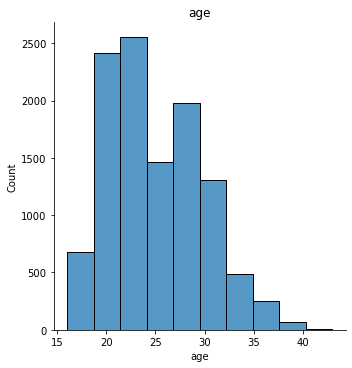

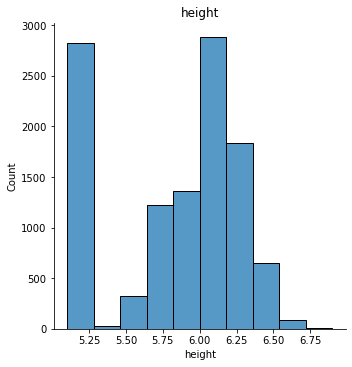

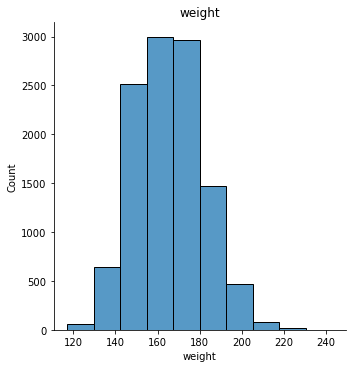

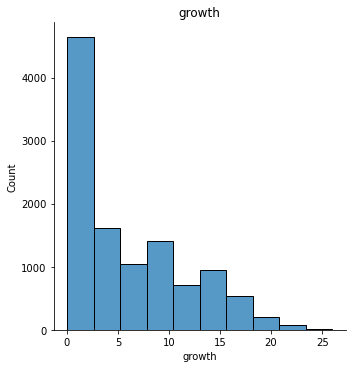

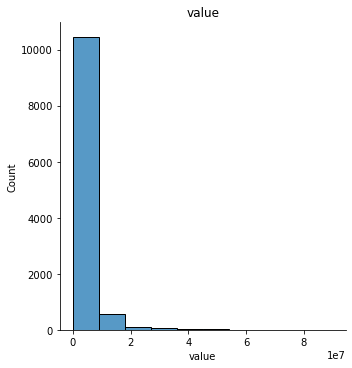

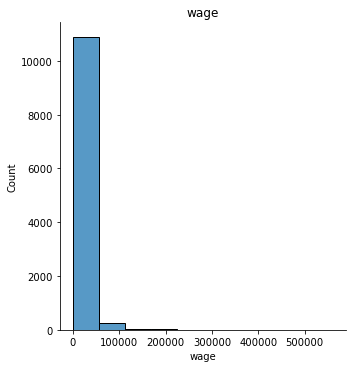

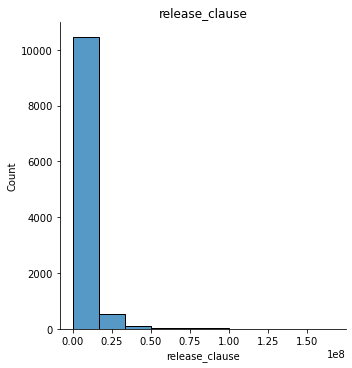

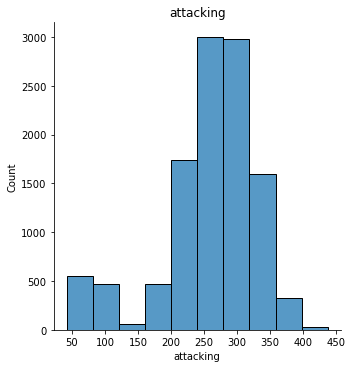

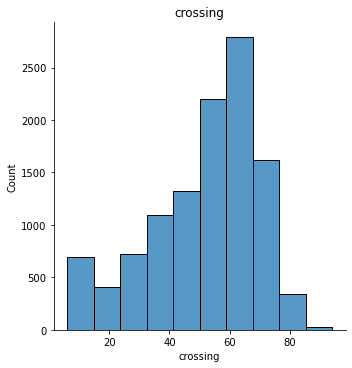

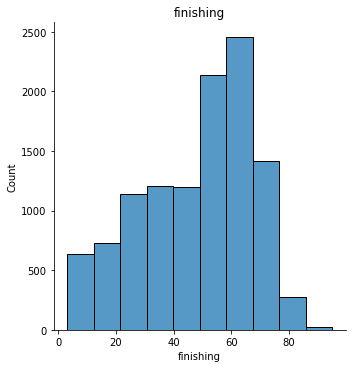

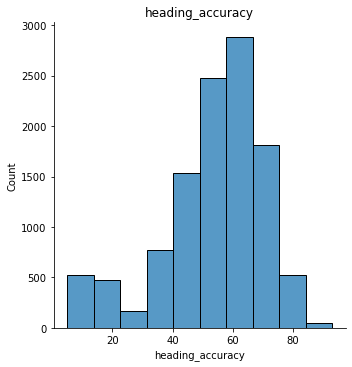

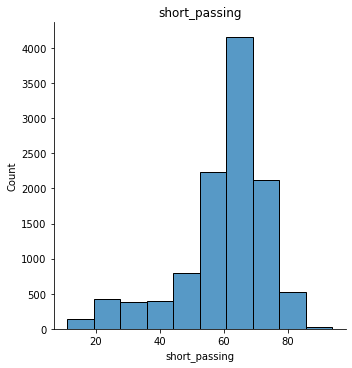

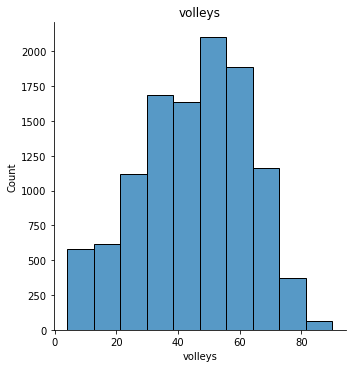

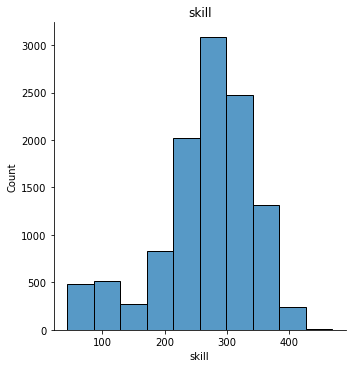

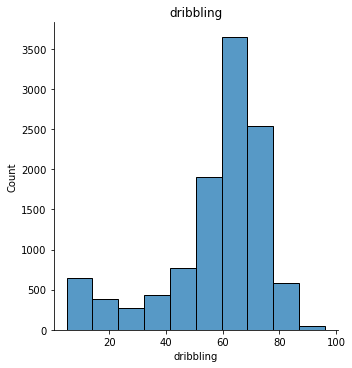

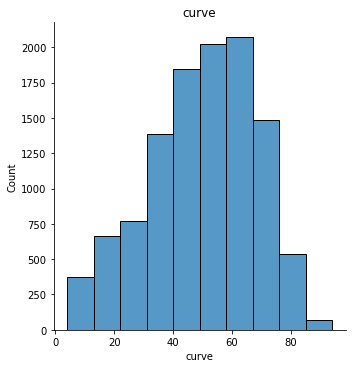

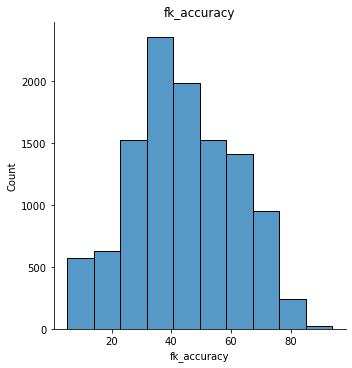

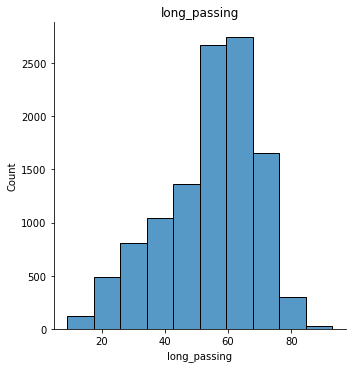

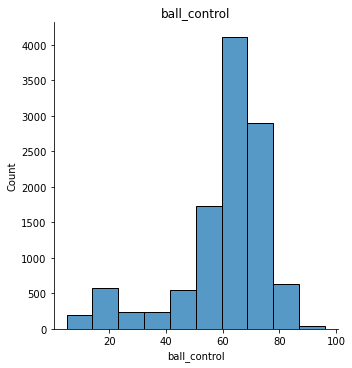

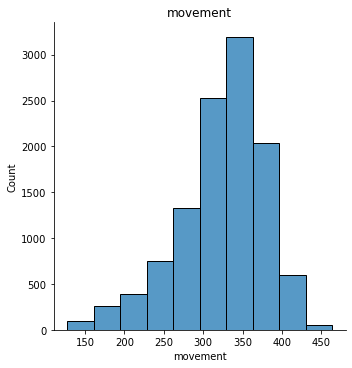

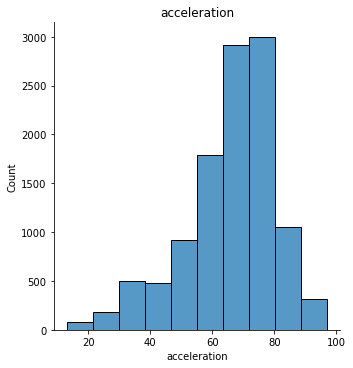

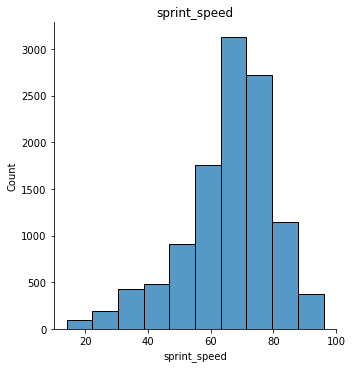

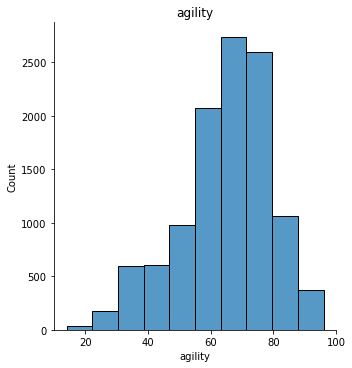

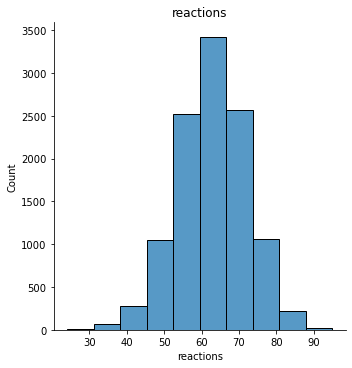

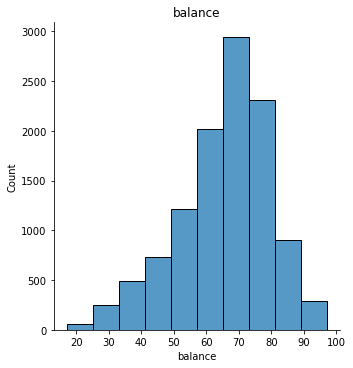

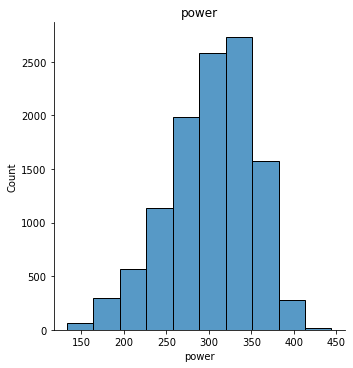

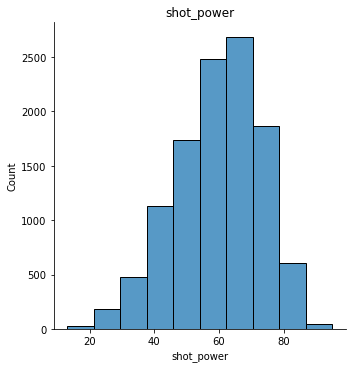

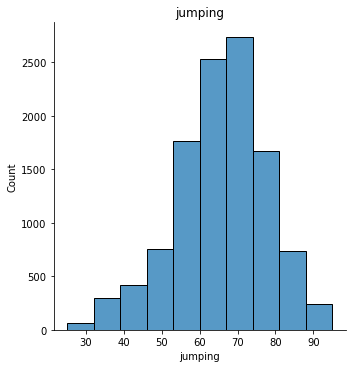

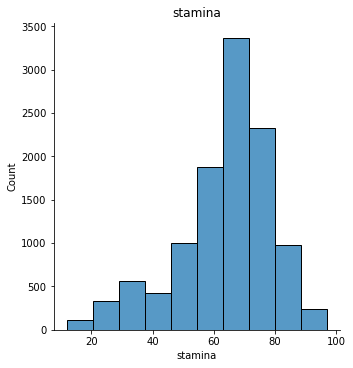

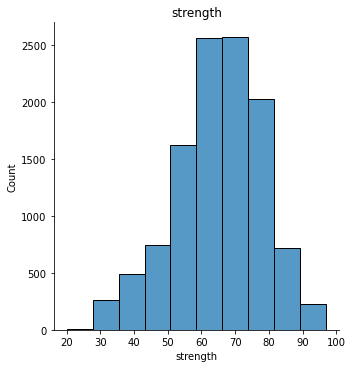

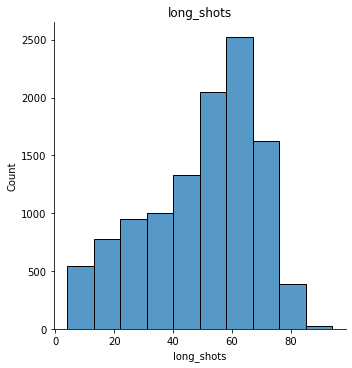

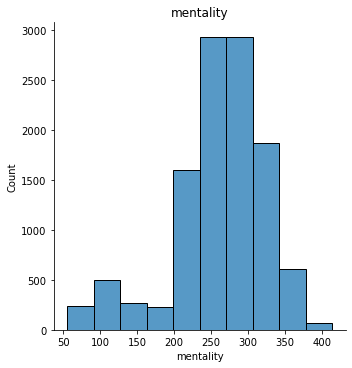

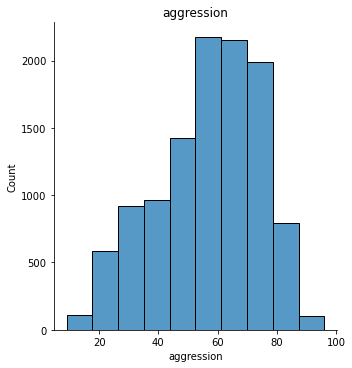

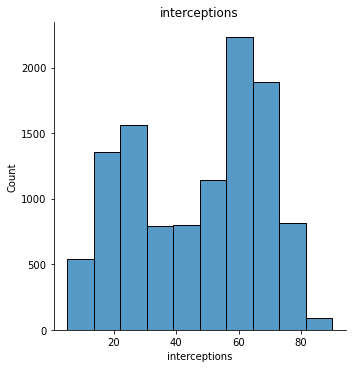

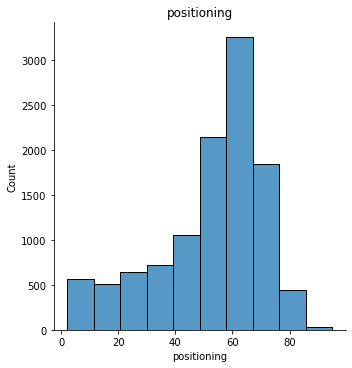

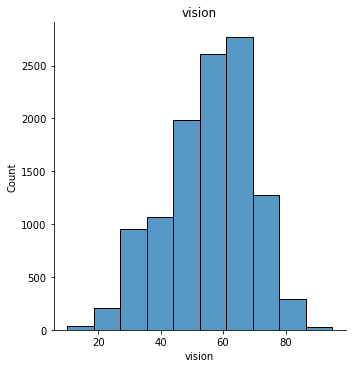

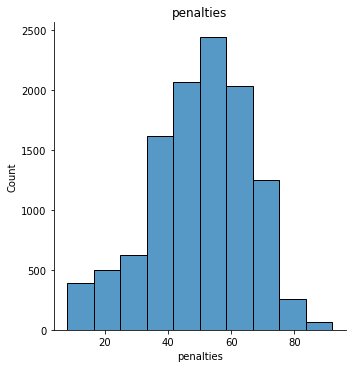

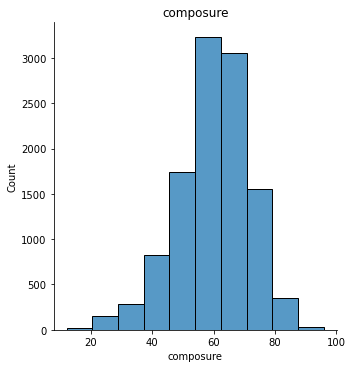

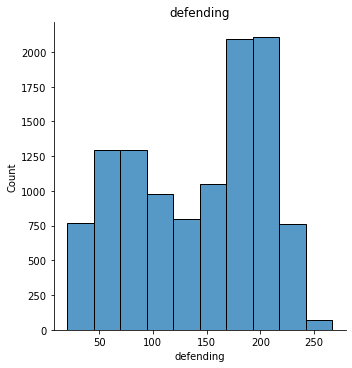

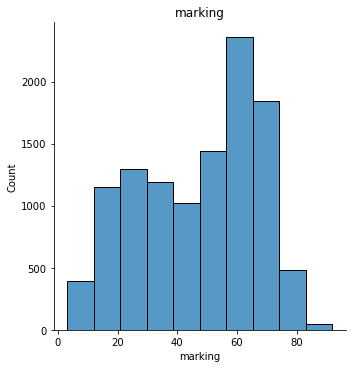

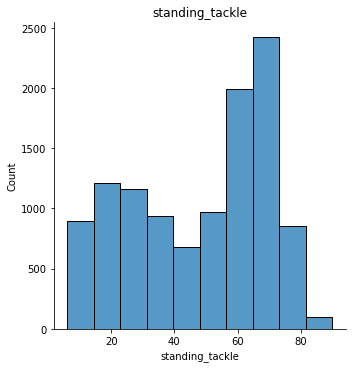

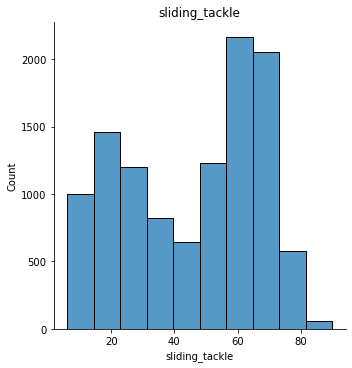

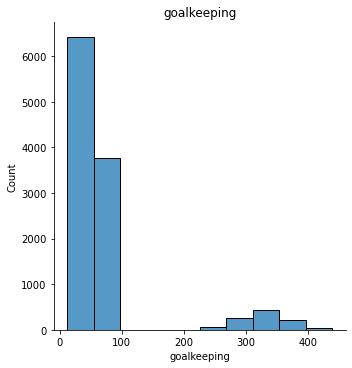

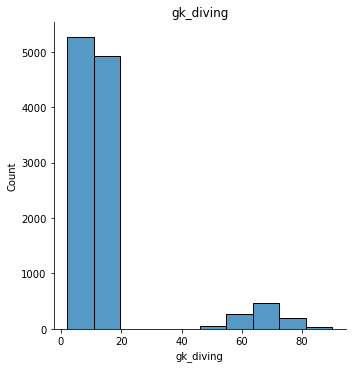

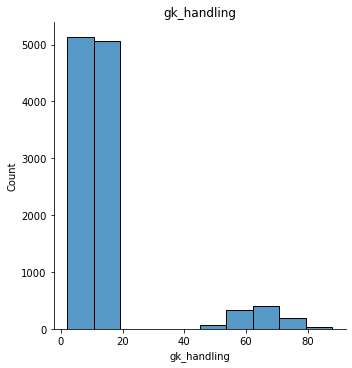

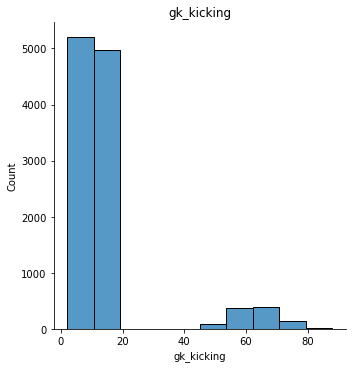

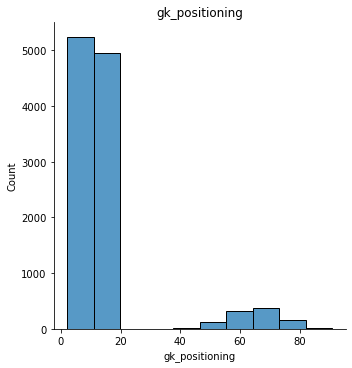

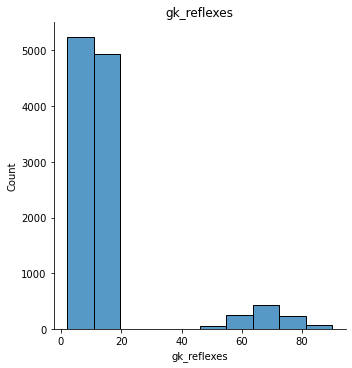

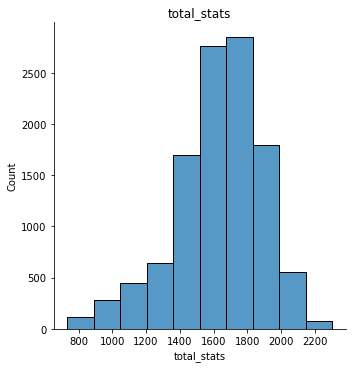

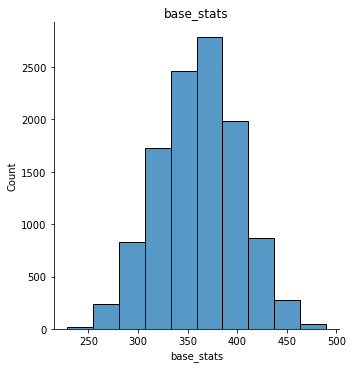

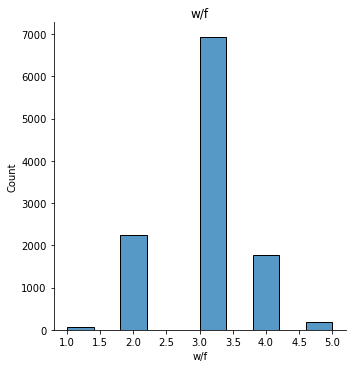

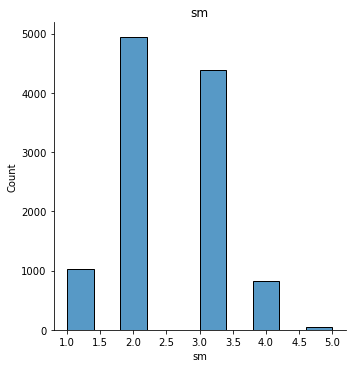

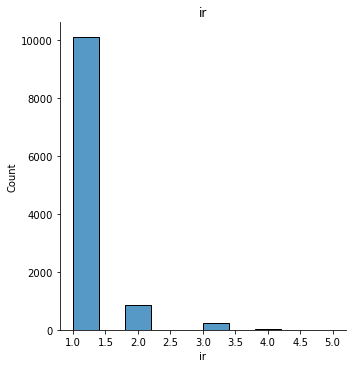

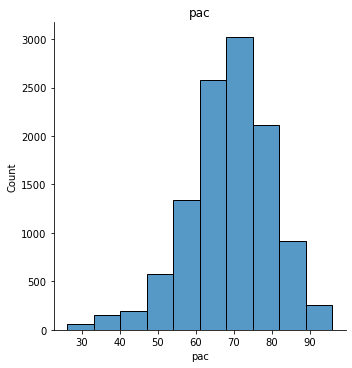

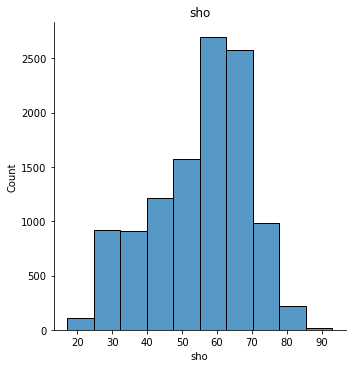

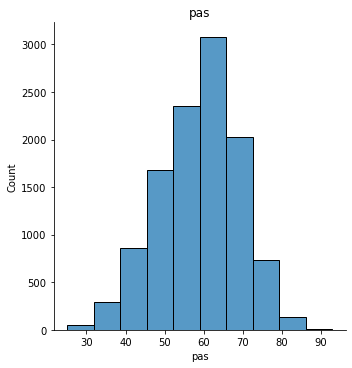

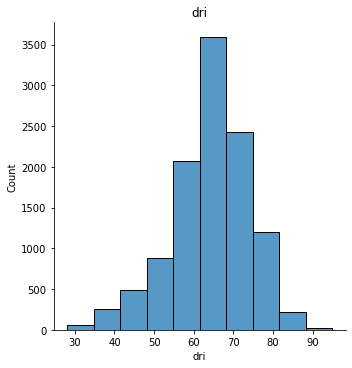

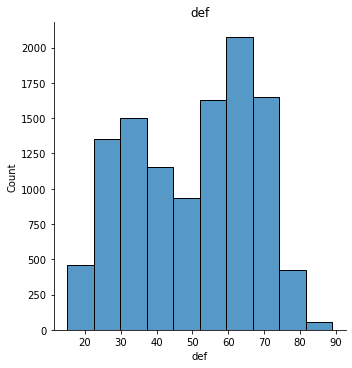

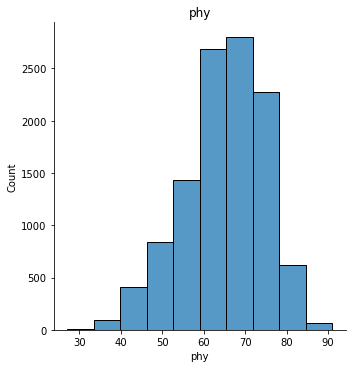

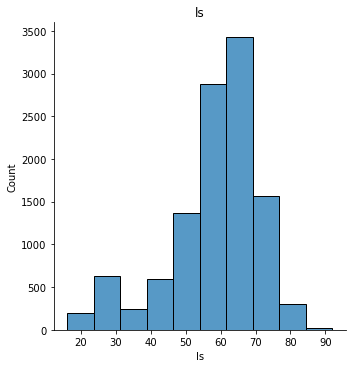

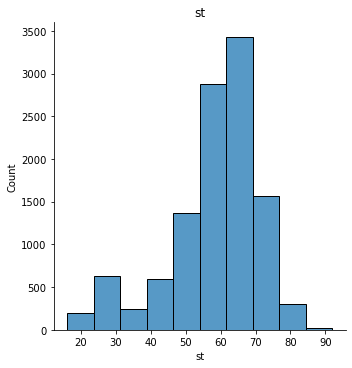

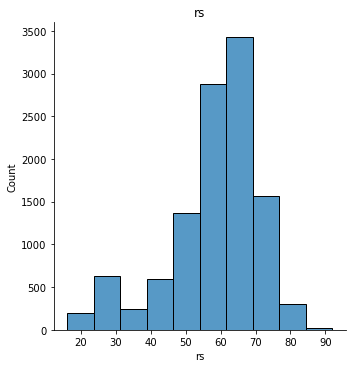

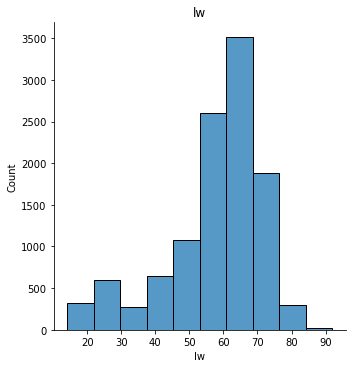

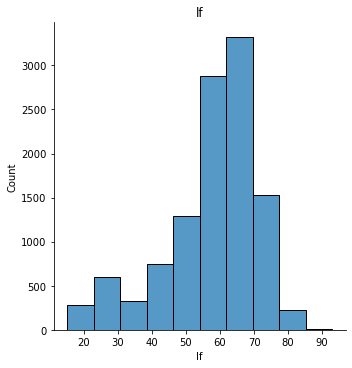

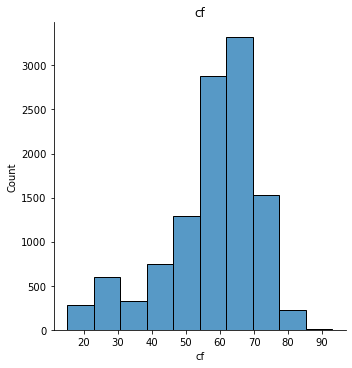

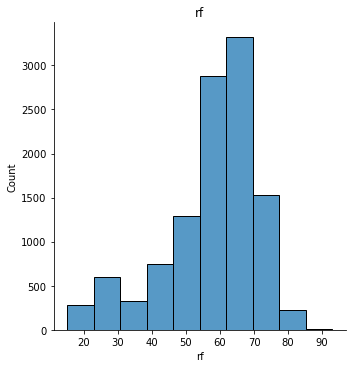

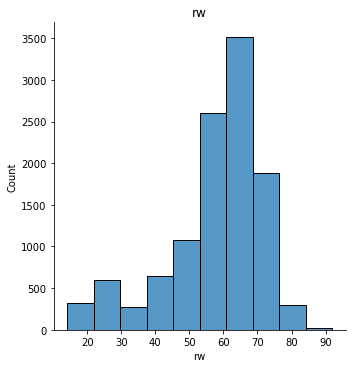

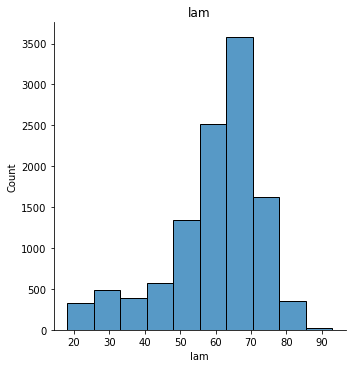

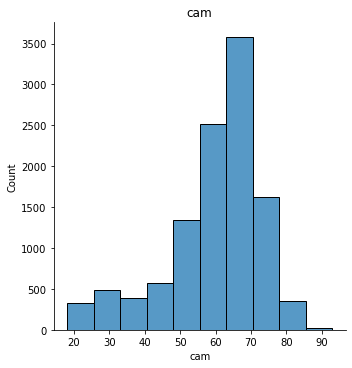

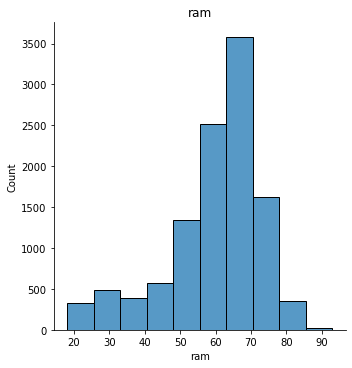

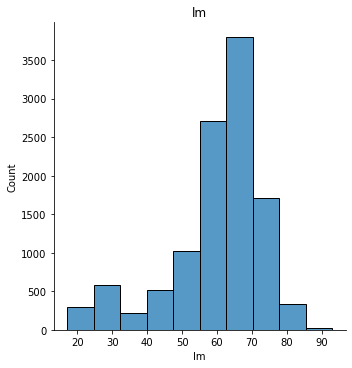

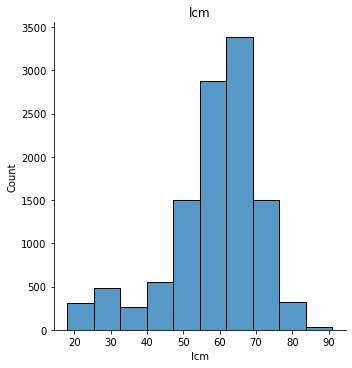

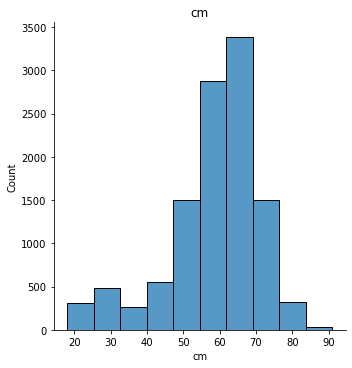

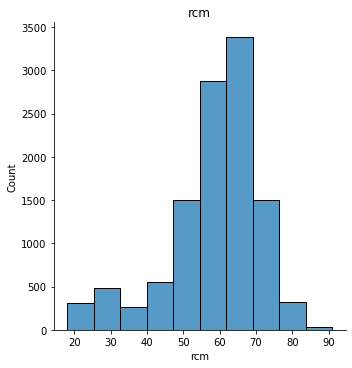

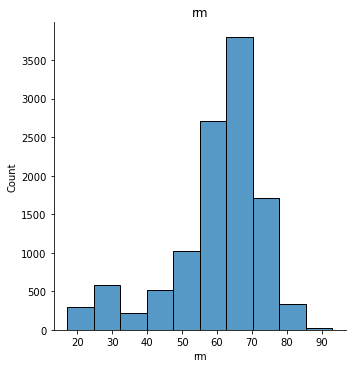

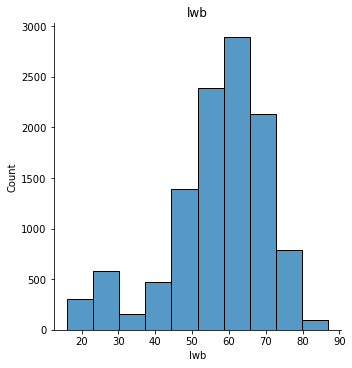

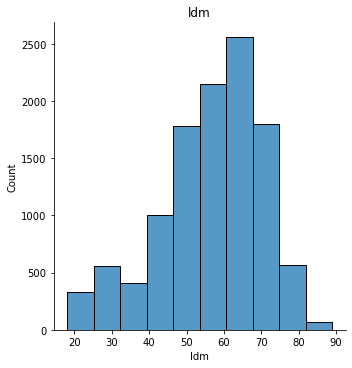

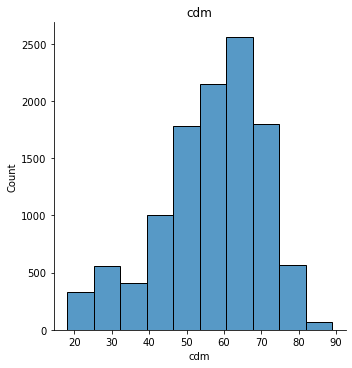

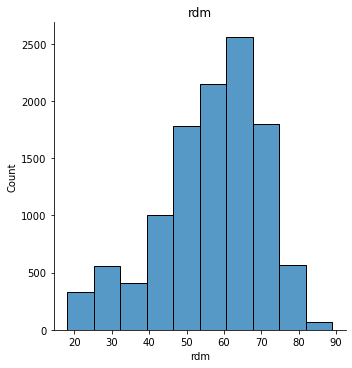

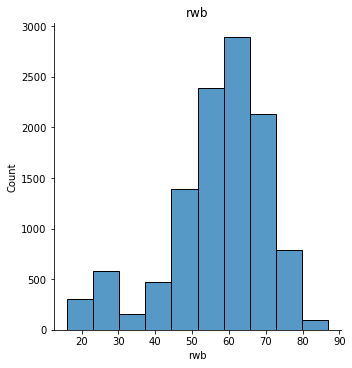

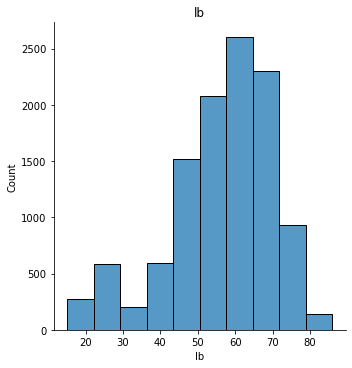

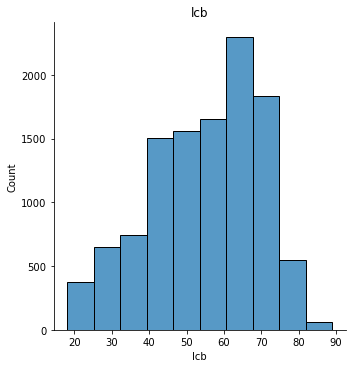

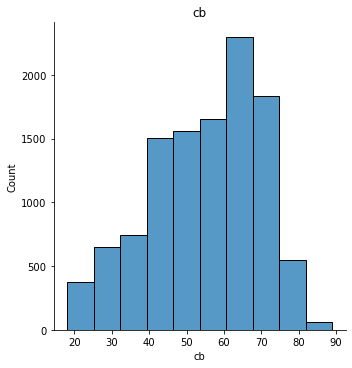

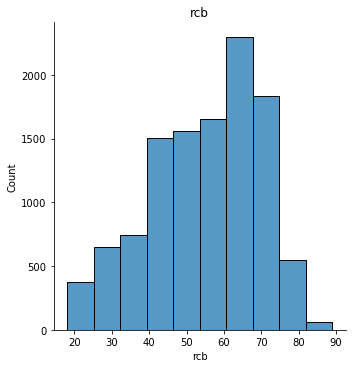

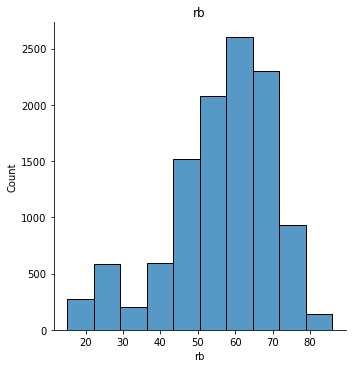

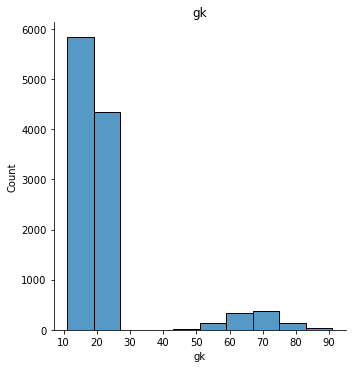

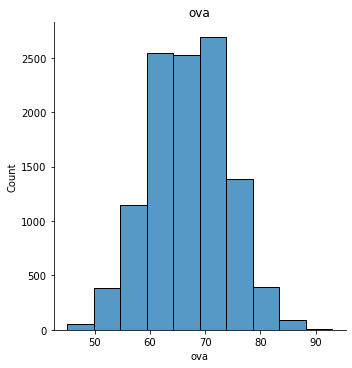

In [23]:
#distribrution plots
for i in numerical.columns:
    sns.displot(x=i, data= numerical, bins=10)
    plt.title(i)
    plt.show()

### Correlations

In [24]:
#sort correlations with target 'ova' from highest to lowest
pd.set_option('display.max_rows', None)
data[data.columns[1:]].corr()['ova'][:]

age                 0.527975
height              0.033210
weight              0.148655
growth             -0.603298
value               0.645975
wage                0.581912
release_clause      0.616105
attacking           0.435626
crossing            0.392291
finishing           0.307728
heading_accuracy    0.302936
short_passing       0.495942
volleys             0.362341
skill               0.446133
dribbling           0.354412
curve               0.403804
fk_accuracy         0.371425
long_passing        0.482022
ball_control        0.433365
movement            0.318980
acceleration        0.154514
sprint_speed        0.166399
agility             0.237874
reactions           0.875577
balance             0.105677
power               0.559118
shot_power          0.547342
jumping             0.259352
stamina             0.353679
strength            0.338661
long_shots          0.397369
mentality           0.498227
aggression          0.386250
interceptions       0.301159
positioning   

In [25]:
keep = (((numerical.corrwith(numerical['ova']))**2)**.5) #transfer negative correlated ones to psotive for later sorting from highest to lowest

In [26]:
#keep only columns that correlate more than 0.5 with target value
corrs_drop = []
threshold = 0.5
for i in range(keep.shape[0]):
    if keep[i] < threshold:
        keep[i] = np.nan
        corrs_drop.append(keep.index[i])
        
keep = keep.dropna()
numerical = numerical.drop(corrs_drop, axis=1)

numerical.head()

,age,growth,value,wage,release_clause,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,lcm,cm,rcm,ova
0,26,1,525000.0,4000.0,801000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64,64,64,64
1,30,0,8500000.0,23000.0,0.0,75,372,74,72.0,70.0,1961,412,68,82,71,70,70,70,77
2,33,0,9000000.0,49000.0,15300000.0,78,308,79,78.0,82.0,1925,404,78,86,56,76,76,76,80
3,22,13,275000.0,4000.0,694000.0,55,277,57,54.0,48.0,1527,329,54,57,60,58,58,58,59
4,23,8,725000.0,2000.0,1400000.0,62,280,61,64.0,58.0,1664,360,60,64,66,65,65,65,65


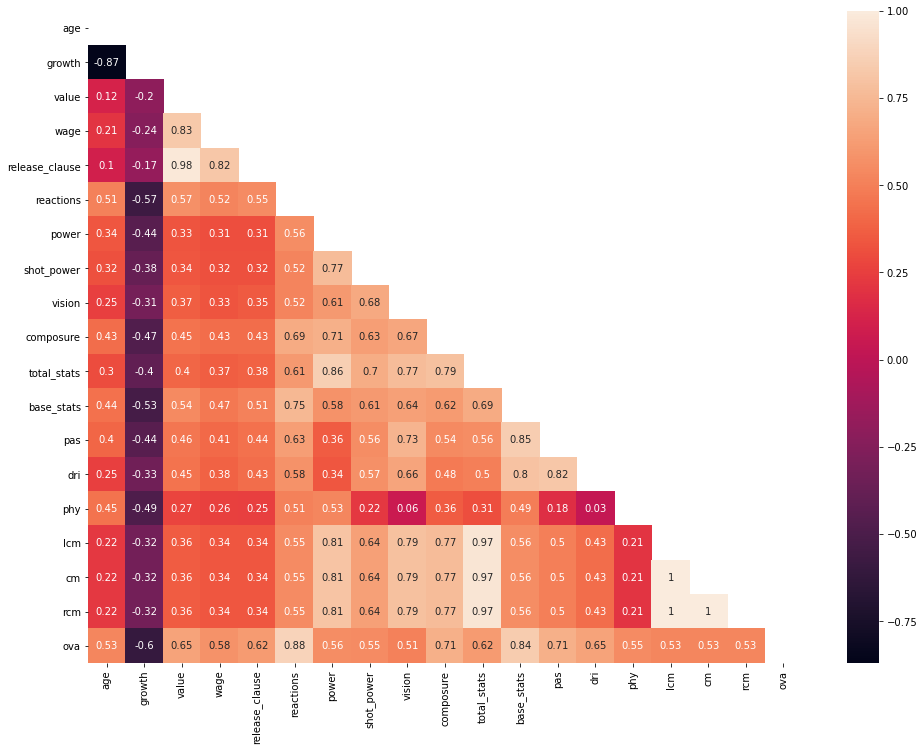

In [27]:
corr = np.corrcoef(numerical.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(numerical.corr().round(2), mask=mask, annot = True)

#### delete the columnswhich shows a high correlation with one of the values that already correlated high with ova

In [28]:
numerical_corr_clean=numerical.drop(['growth','release_clause','lcm','cm','rcm'], axis=1)
numerical_corr_clean.head(1)

,age,value,wage,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,ova
0,26,525000.0,4000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64


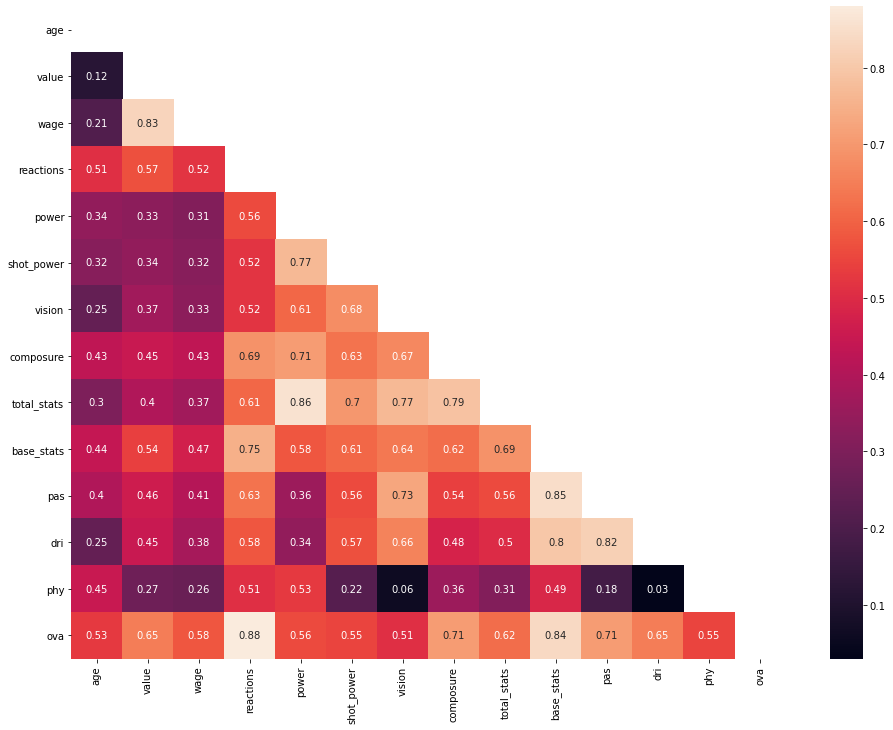

In [29]:
corr = np.corrcoef(numerical_corr_clean.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(numerical_corr_clean.corr().round(2), mask=mask, annot = True)

In [30]:
#split the data from the target for further modeling
X_num=numerical_corr_clean
#data.select_dtypes(include = np.number)

y= data['ova']
X_num=X_num.drop(['ova'], axis=1)

In [31]:
X_num.head(1)

,age,value,wage,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy
0,26,525000.0,4000.0,66,306,62,68.0,54.0,1682,357,63,63,60


### Normalize numerical data

In [32]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
#x_normalized
data_norm=pd.DataFrame(x_normalized, columns=X_num.columns)

(11222, 13)


In [33]:
data_norm.head(1)

,age,value,wage,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy
0,0.37037,0.005833,0.007143,0.591549,0.55627,0.597561,0.682353,0.5,0.604577,0.492366,0.558824,0.522388,0.515625


## Closer look at categorical data

In [34]:
categorical=data.select_dtypes(include=['object'])
categorical.head()

,name,nationality,club,bp,position,team_&_contract,foot,joined,contract,a/w,d/w,hits
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,Right,"Jul 1, 2015",2015 ~ 2020,High,Medium,3
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",Right,"Jan 16, 2015","Dec 31, 2020 On Loan",High,Low,44
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,Right,"Jan 31, 2019",2019 ~ 2022,High,Medium,73
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,Right,"Jul 1, 2016",2016 ~ 2021,Medium,Medium,7
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,Right,"Jul 1, 2018",2018 ~ 2021,Low,Medium,4


In [35]:
categorical=categorical.drop(['name','nationality','club','position','team_&_contract','joined','contract','hits'], axis=1)
#use only bp, weight, foot, a/w, d/w
categorical.head(1)

,bp,foot,a/w,d/w
0,CM,Right,High,Medium


### one hot encoder

In [36]:
df2=categorical
encoder = OneHotEncoder().fit(df2)
encoded_for_p = encoder.transform(df2).toarray()
encoded_for_p
encoder.categories_
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded_for_p = onehot_encoded_for_p.drop(cols_to_drop,axis=1)
onehot_encoded_for_p.head(2)

,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Right,Low,Medium,Low,Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [37]:
#concat data
X_regression=pd.concat([data_norm.reset_index(drop=True),onehot_encoded_for_p.reset_index(drop=True)], axis=1)
X_regression.head(1)

,age,value,wage,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Right,Low,Medium,Low,Medium
0,0.37037,0.005833,0.007143,0.591549,0.55627,0.597561,0.682353,0.5,0.604577,0.492366,0.558824,0.522388,0.515625,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Linear regression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_regression, y, test_size=0.2, random_state=42)
X_train.head(1)

,age,value,wage,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Right,Low,Medium,Low,Medium
8037,0.037037,0.001222,0.000893,0.380282,0.376206,0.329268,0.247059,0.369048,0.33185,0.167939,0.132353,0.149254,0.515625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [39]:
#apply linear regression
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
predictions= lm.predict(X_test)
print('R2=',r2_score(y_test, predictions))

mse=np.sqrt(mean_squared_error(y_test,predictions))
print('MSE=',mse)

rmse = math.sqrt(mse)
print('RMSE=',rmse)

mae = mean_absolute_error(y_test, predictions)
print('MAE=', mae)

R2= 0.9084581037482774
MSE= 2.117633956939681
RMSE= 1.4552092485067847
MAE= 1.652434799014348


In [41]:

#save model
dump(lm, open('finalized_model.pkl', 'wb'))
 
#save numerical and categorical encoders  
dump(transformer, open('fifa_minmax.pkl', 'wb'))
dump(encoder, open('fifa_onehot.pkl', 'wb'))